<center><img src="https://storage.googleapis.com/kaggle-datasets-images/2289007/3846912/ad5e128929f5ac26133b67a6110de7c0/dataset-cover.jpg?" style="width: 600px;"/>

# Classification -Credit Score

A credit score is a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports.

Companies use credit scores to make decisions on whether to offer you a mortgage, credit card, auto loan, and other credit products, as well as for tenant screening and insurance. They are also used to determine the interest rate and credit limit you receive.

## Objective:

To build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score.


### Agenda:
1. Importing the libraries
2. Loading the Dataset
3. Data Cleaning
4. Data Visualization
5. Encoding
6. Feature Selection
7. Data Manipulation
8. Implementing ML Algorithms
9. Conclusion

#### 1. Importing the libraries
We start off this project by importing all the necessary libraries that will be required for the process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score,  precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay 



#### 2. Loading the Dataset
Loading the data and removing unnecessary column from the dataframe

In [2]:
df = pd.read_csv('credit_score.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

**Dataset Information:**
Credit score dataset contains 1 lac records with 28 features.

**Attributes and Description**
+ ID = unique identification of an entry
+ Customer_ID = unique identification of a person
+ Month = month of the year
+ Name = name of a person
+ Age = age of the person
+ SSN = social security number of a person
+ Occupation = occupation of the person
+ Annual_Income = annual income of the person
+ Monthly_Inhand_Salary = monthly base salary of a person
+ Num_Bank_Accounts = number of bank accounts a person holds
+ Num_Credit_Card = number of other credit cards held by a person 
+ Interest_Rate = interest rate on credit card
+ Num_of_Loan = number of loans taken from the bank
+ Type_of_Loan = types of loan taken by a person
+ Delay_from_due_date = average number of days delayed from the payment date
+ Num_of_Delayed_Payment = age of the person
+ Changed_Credit_Limit = percentage change in credit card limit
+ Num_Credit_Inquiries = number of credit card inquiries
+ Credit_Mix = classification of the mix of credits
+ Outstanding_Debt = remaining debt to be paid (in USD)
+ Credit_Utilization_Ratio = utilization ratio of credit card
+ Credit_History_Age = the age of credit history of the person
+ Payment_of_Min_Amount = the minimum amount was paid by the person
+ Total_EMI_per_month = monthly EMI payments (in USD)
+ Amount_Invested_monthly = monthly amount invested by the customer (in USD)
+ Payment_Behaviour = payment behavior of the customer (in USD)
+ Monthly_Balance = monthly balance amount of the customer (in USD)
+ Credit_Score = the bracket of credit score


In [4]:
df = df.drop(columns=["ID","Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


**Checking the shape of a dataframe and datatypes of all columns 
along with calculating the statistical data.**


In [5]:
df.shape

(100000, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


### 3. Data Cleaning
Checking out the missing values in a dataframe

In [8]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**Replacing the special characters with empty string or with null values according to the data and converting it into int or float datatype. Also, Converting the categorical values of some columns into integer values.**


In [9]:
df["Age"]=df["Age"].str.replace("_","")
df["Age"]=df["Age"].astype(int)

In [10]:
df["Occupation"]=df["Occupation"].replace("_______",np.nan)

In [11]:
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")
df["Annual_Income"]=df["Annual_Income"].astype(float)

In [12]:
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"]=df["Num_of_Loan"].astype(int)

In [13]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype(float)

In [14]:
df["Credit_Score"]=df["Credit_Score"].replace(["Poor", "Standard", "Good"],[0,1,2])

In [15]:
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("_","")
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)

In [16]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [17]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype(float)

In [18]:
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM","No")
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace(["Yes","No"],[1,0])

In [19]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype(float)

In [20]:
df["Credit_Mix"]=df["Credit_Mix"].replace("_",np.nan)
df["Credit_Mix"]=df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])

In [21]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].replace("_",np.nan)
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

**Clearly, The datatype of the columns have been changed after performing the operation**


In [23]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [24]:
df=df.fillna(method="ffill")
df=df.fillna(method="bfill")
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**After replacing the special characters with null value. The new missing value is shown in the figure. Here Forward and backward filling method is used to fill the missing values.**


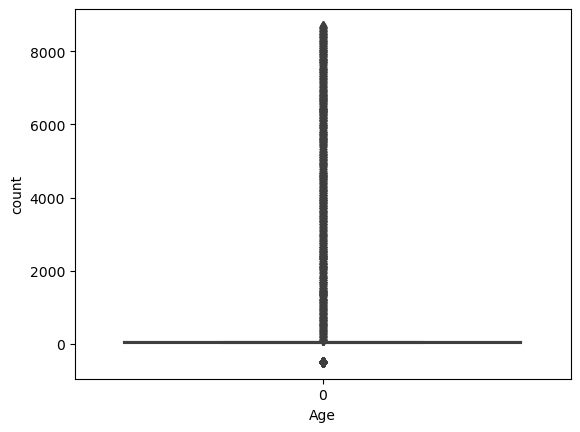

In [25]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

**removing outliers from age since all other columns values are relevant**

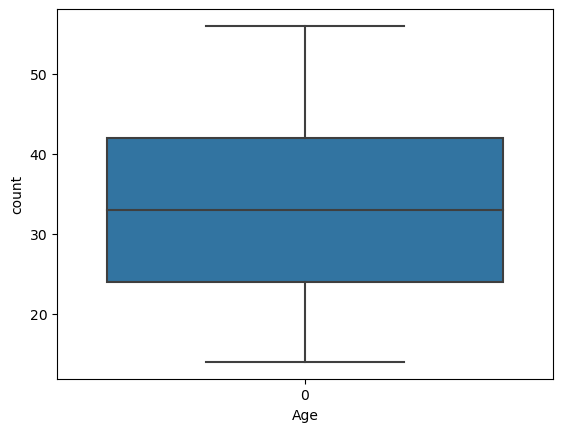

In [26]:
col_names=["Age"]
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
data = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]
sns.boxplot(data["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

#### 4. Data Visualization

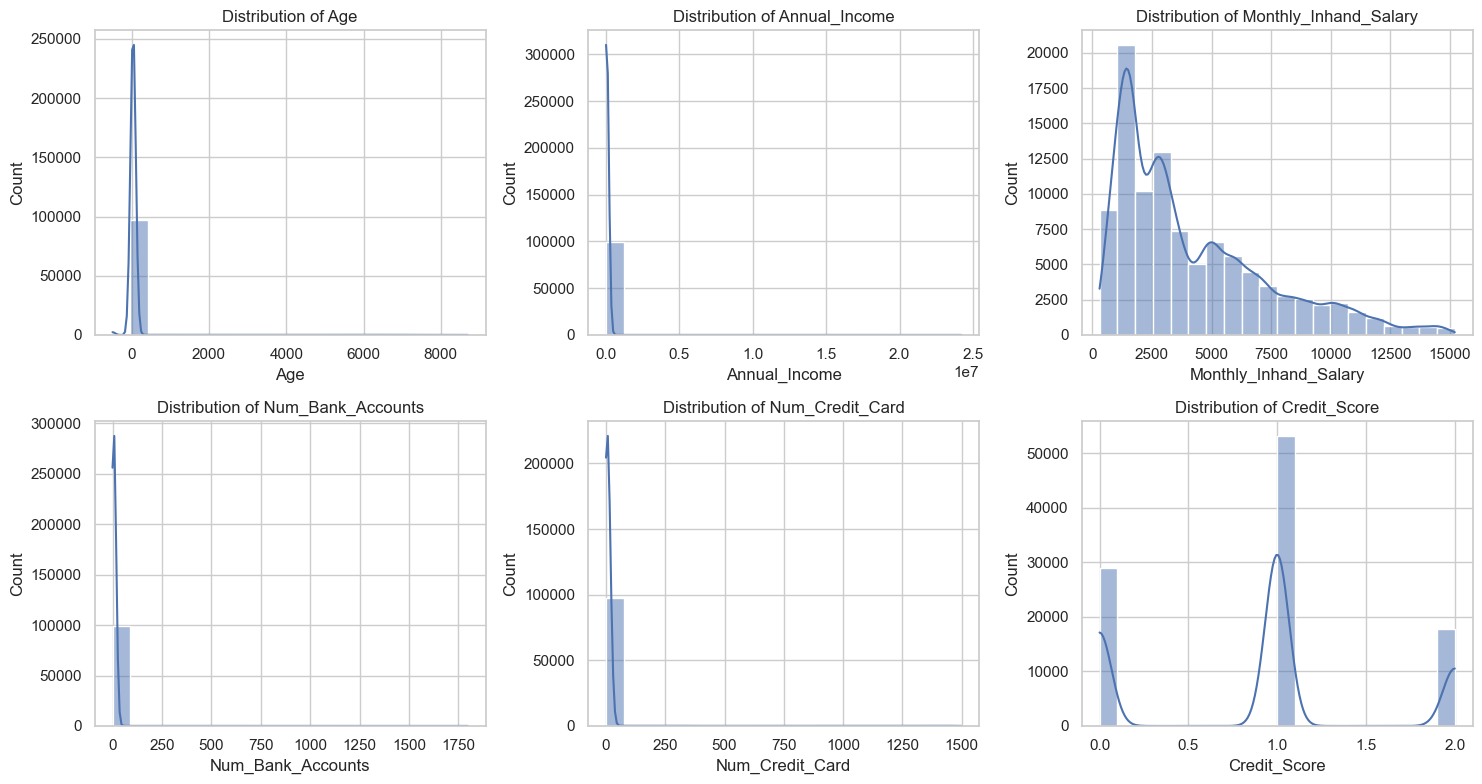

In [27]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plotting histograms for numerical columns
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Credit_Score']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

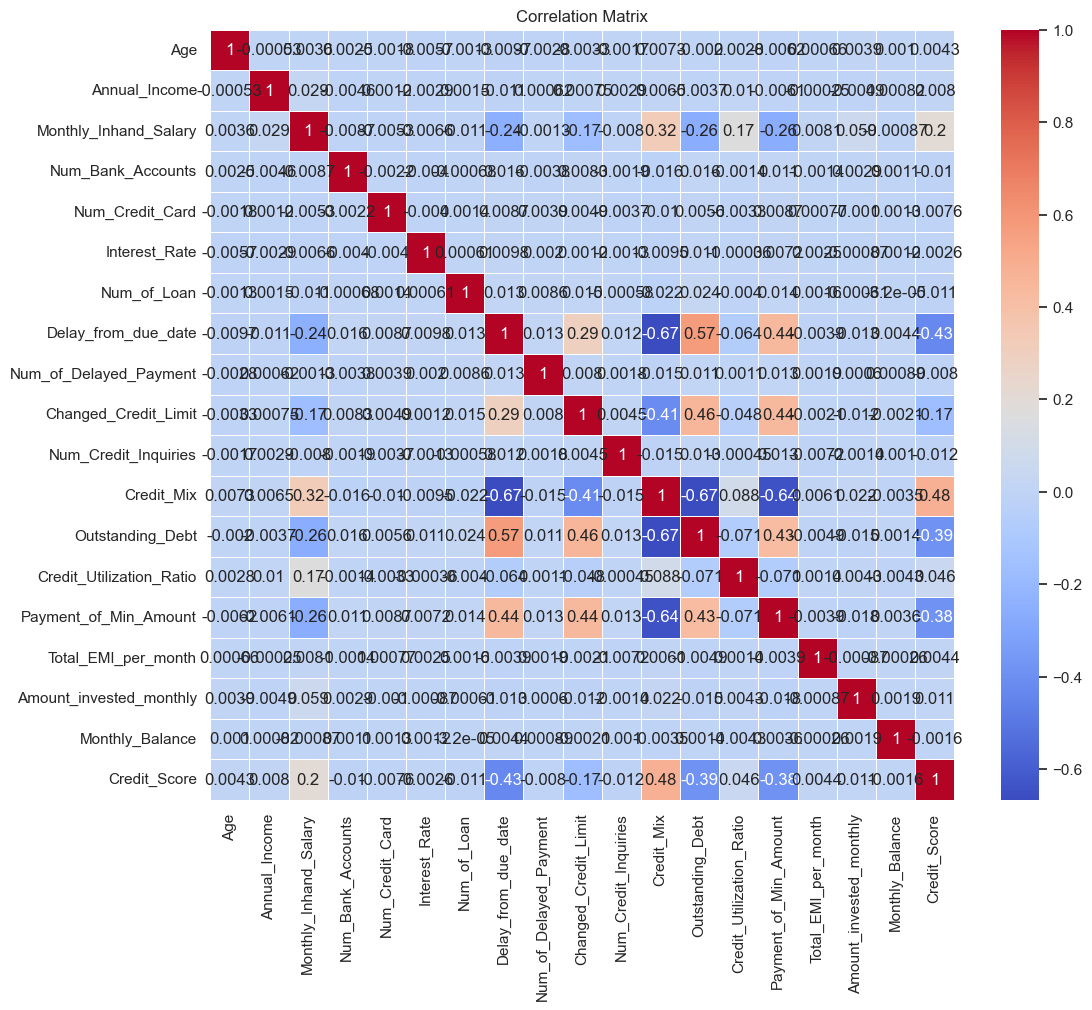

In [28]:
# Plotting correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

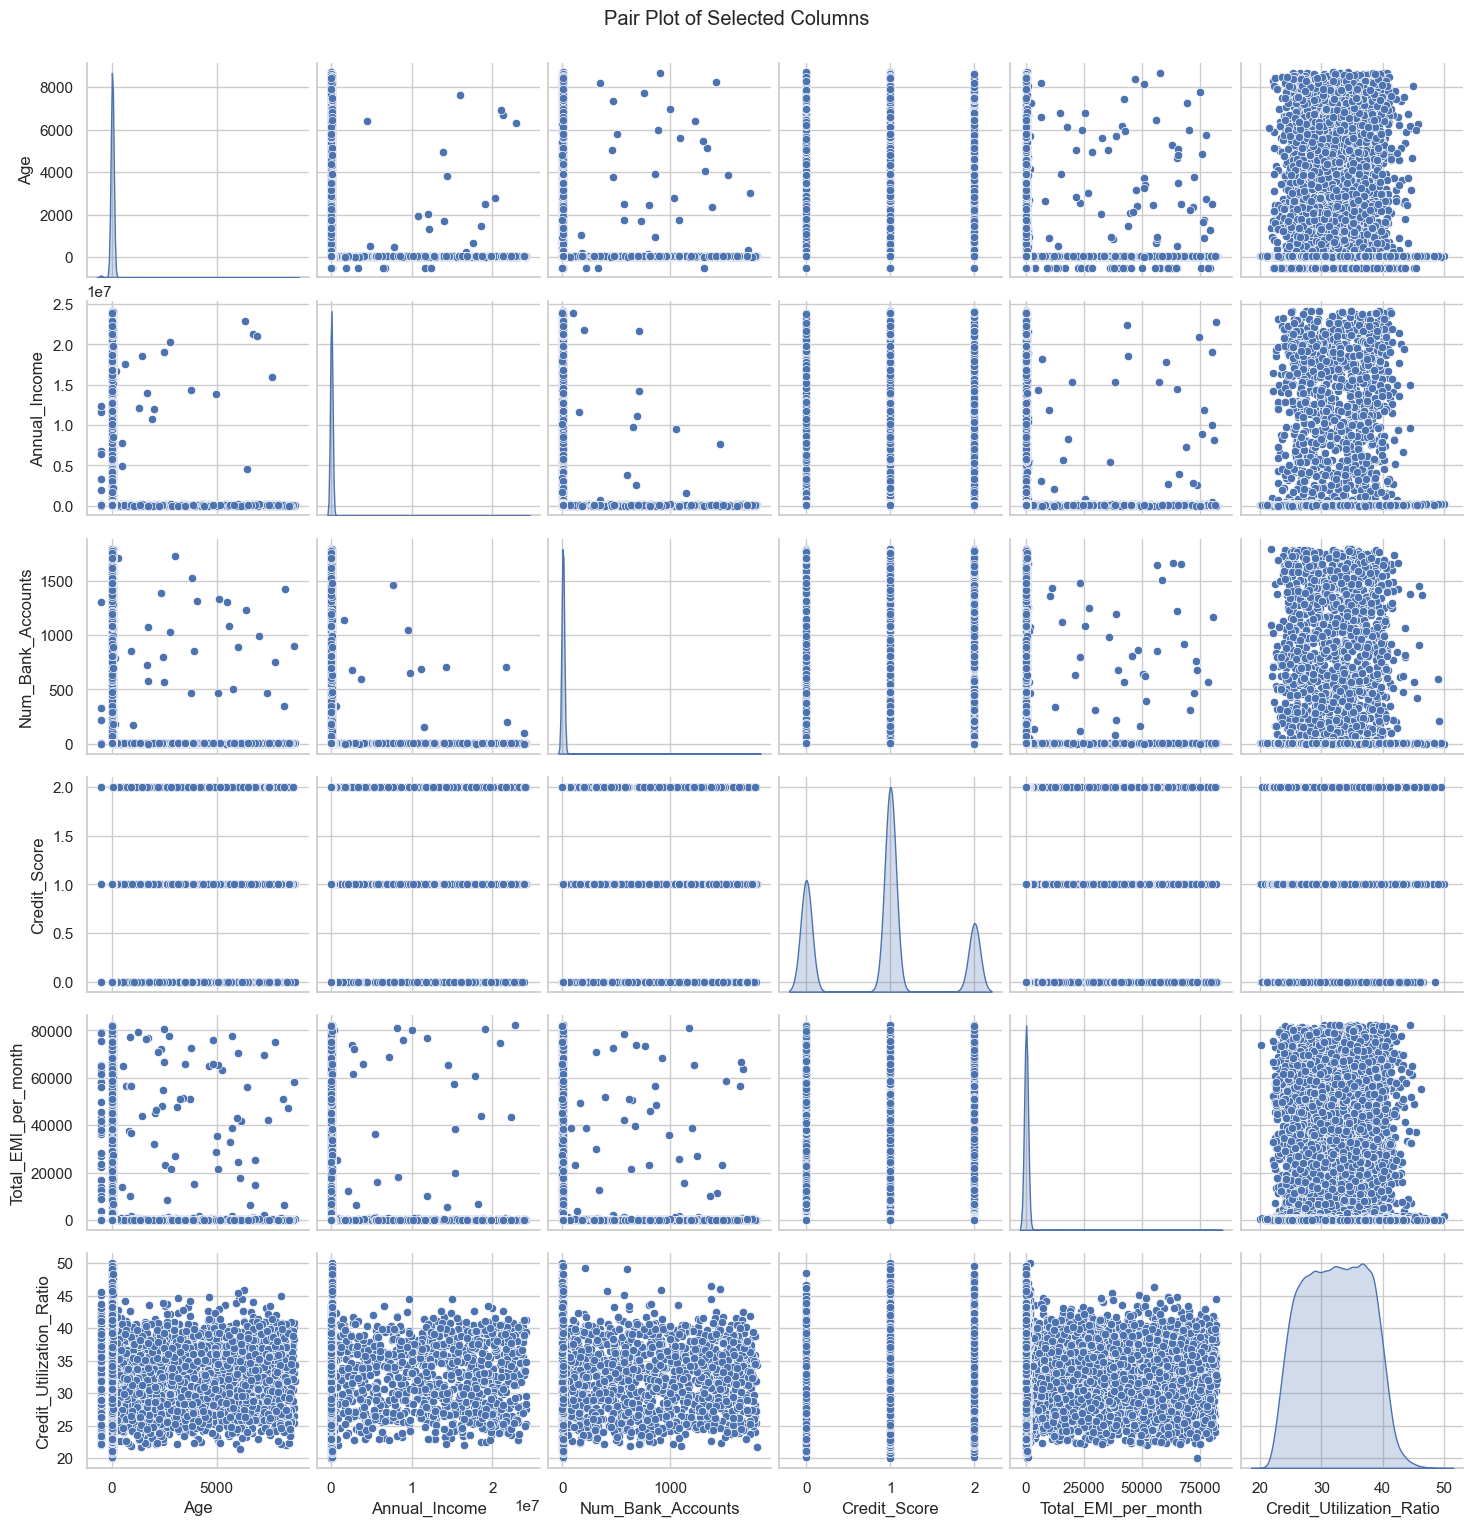

In [29]:
# Pair plot for selected columns
selected_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Credit_Score', 'Total_EMI_per_month', 'Credit_Utilization_Ratio']

sns.pairplot(df[selected_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

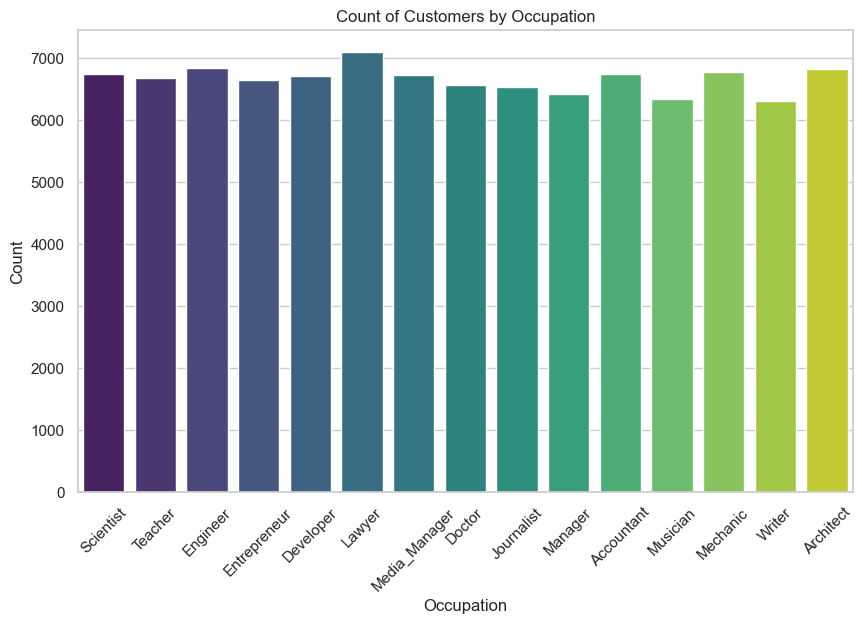

In [30]:
# Count plot for 'Occupation'
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df, palette='viridis')
plt.title('Count of Customers by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

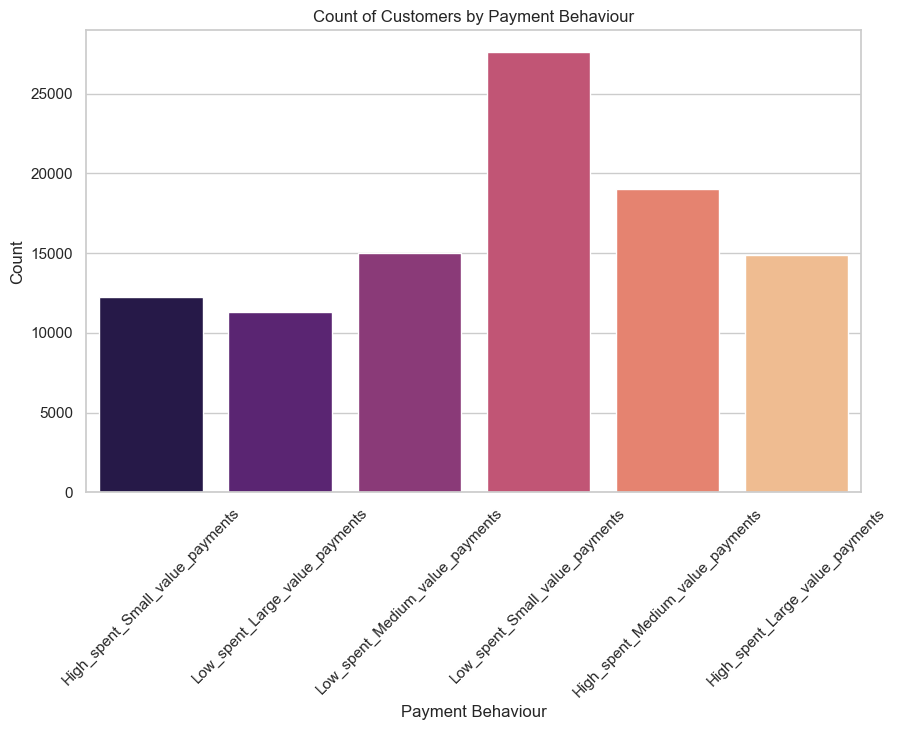

In [31]:
# Count plot for 'Payment_Behaviour'
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Behaviour', data=df, palette='magma')
plt.title('Count of Customers by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

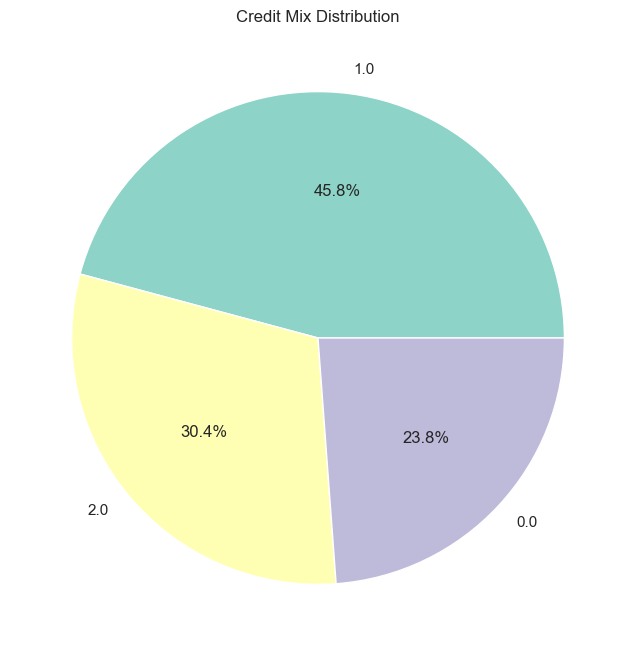

In [32]:
# Pie chart for 'Credit_Mix'
plt.figure(figsize=(8, 8))
credit_mix_counts = df['Credit_Mix'].value_counts()
plt.pie(credit_mix_counts, labels=credit_mix_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Credit Mix Distribution')
plt.show()

#### 5. Encoding
Performing One Hot Encoding for categorical features of a dataframe

In [33]:
le =LabelEncoder()

In [34]:
df["Month"]=le.fit_transform(df["Month"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Payment_Behaviour"]=le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

#### 6. Feature Selection

In [35]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Credit_Score')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.277722
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.321474
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16     Payment_of_Min_Amount  0.476749
17       Total_EMI_per_month  0.972258
18   Amount_invested_monthly  0.911321
19         Payment_Behaviour  0.310525
20           Monthly_Balance  1.000207


**Selecting the features using VIF. VIF should be less than 5. Here, all
features have VIF value less than 5, So we will select all the features.**


#### 7. Data Manipulation

In [36]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score'] # target column

In [37]:
# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 8. Implementing ML Algorithms

**1. Logistic Regression**

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
lr_y_pred = lr.predict(x_test)

In [42]:
difference = pd.DataFrame(np.c_[y_test,lr_y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2
...,...,...
19995,1,1
19996,1,1
19997,0,1
19998,1,1


In [43]:
# Training Accuracy Score
train_accuracy_lr = accuracy_score(y_train, lr.predict(x_train))

# Cross Validation Score
cross_val_scores = cross_val_score(lr, X, y, cv=5)
cross_val_score_avg_lr = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_lr = round(accuracy_score(y_test,lr_y_pred)*100, 2)

# Precision Score
precision_lr = precision_score(y_test, lr_y_pred, average='weighted')

# Recall Score
recall_lr = recall_score(y_test, lr_y_pred, average='weighted')

# F1-Score Score
f1_lr = f1_score(y_test, lr_y_pred, average='weighted')


In [44]:
# Display the metrics for Logistic Regression
print("Metrics for Logistic Regression:")
print(f"Training Accuracy Score: {train_accuracy_lr}")
print(f"Cross Validation Score: {cross_val_score_avg_lr}")
print(f"Testing Accuracy Score: {test_accuracy_lr}")
print(f"Precision Score: {precision_lr}")
print(f"Recall Score: {recall_lr}")
print(f"F1-Score: {f1_lr}")

Metrics for Logistic Regression:
Training Accuracy Score: 0.61985
Cross Validation Score: 0.28998
Testing Accuracy Score: 61.86
Precision Score: 0.6252727887575872
Recall Score: 0.61855
F1-Score: 0.6118968159256764


In [45]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_y_pred)
print(cm_lr)

[[2420 2898  556]
 [1305 7572 1722]
 [  49 1099 2379]]


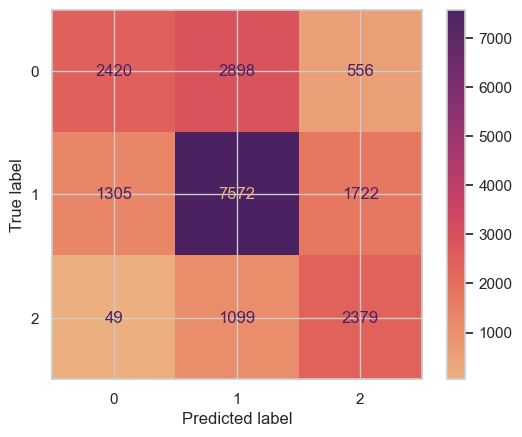

In [46]:
# Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred,cmap="flare")


In [47]:
# Classification Report
cr_lr = classification_report(y_test, lr_y_pred)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      5874
           1       0.65      0.71      0.68     10599
           2       0.51      0.67      0.58      3527

    accuracy                           0.62     20000
   macro avg       0.60      0.60      0.59     20000
weighted avg       0.63      0.62      0.61     20000



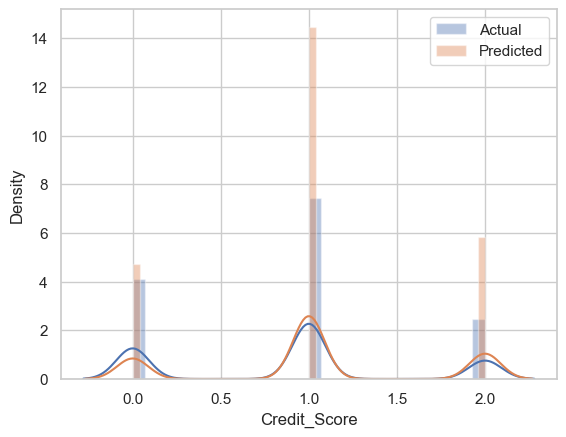

In [48]:
# Plotting the graph of actual and predicted Credit Score
sns.distplot(y_test,label = 'Actual')
sns.distplot(lr_y_pred,label = 'Predicted')
plt.legend()
plt.show()

**The accuracy of the logistic regression model is 61.86 percent**


**2. Decision Tree**

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
dt_y_pred = dt.predict(x_test)

In [52]:
difference = pd.DataFrame(np.c_[y_test,dt_y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2
...,...,...
19995,1,1
19996,1,1
19997,0,1
19998,1,1


In [53]:
accuracy_score(y_test,dt_y_pred)*100

69.60499999999999

**Hyperparameter Tuning on Decision Tree**

In [54]:
parameters = {'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],  # Corrected parameter name
              'min_samples_leaf': [1, 5, 8, 10]
             }

grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(x_train, y_train)
dt = grid_obj.best_estimator_
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
print('Accuracy of Decision Tree model:', acc_dt)



Accuracy of Decision Tree model: 71.32


**Here, We are using GridSearch CV technique which is used to identify the optimal hyperparameters for a model and the accuracy obtained from Decision 
Tree is 71.32**


In [55]:
# Training Accuracy Score
train_accuracy_dt = accuracy_score(y_train, dt.predict(x_train))

# Cross Validation Score
cross_val_scores = cross_val_score(dt, X, y, cv=5)
cross_val_score_avg_dt = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)*100

# Precision Score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

# Recall Score
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# F1-Score Score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')


In [56]:
# Display the metrics for Decision Tree Classifier
print("Metrics for Decision Tree Classifier:")
print(f"Training Accuracy Score: {train_accuracy_dt}")
print(f"Cross Validation Score: {cross_val_score_avg_dt}")
print(f"Testing Accuracy Score: {test_accuracy_dt}")
print(f"Precision Score: {precision_dt}")
print(f"Recall Score: {recall_dt}")
print(f"F1-Score: {f1_dt}")

Metrics for Decision Tree Classifier:
Training Accuracy Score: 0.7972875
Cross Validation Score: 0.63414
Testing Accuracy Score: 71.325
Precision Score: 0.7118323405026079
Recall Score: 0.71325
F1-Score: 0.7122093657471429


In [57]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[4129 1542  203]
 [1610 8066  923]
 [ 198 1259 2070]]


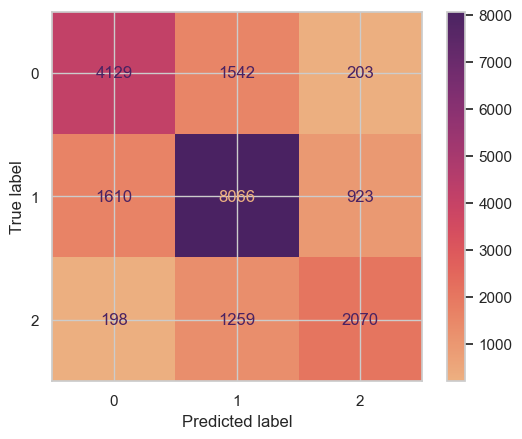

In [58]:
# Confusion Matrix 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt,cmap="flare")

In [59]:
# Classification Report
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      5874
           1       0.74      0.76      0.75     10599
           2       0.65      0.59      0.62      3527

    accuracy                           0.71     20000
   macro avg       0.70      0.68      0.69     20000
weighted avg       0.71      0.71      0.71     20000



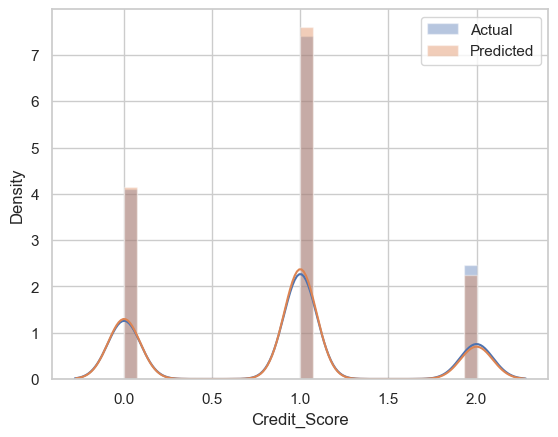

In [60]:
# Plotting the graph of actual and predicted Credit Score
sns.distplot(y_test,label = 'Actual')
sns.distplot(y_pred_dt,label = 'Predicted')
plt.legend()
plt.show()

**The accuracy of the decision tree model is 71.32 percent**

**3. Random Forest**

In [74]:
rf = RandomForestClassifier()

In [75]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
rf_y_pred = rf.predict(x_test)

In [77]:
difference = pd.DataFrame(np.c_[y_test,rf_y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2
...,...,...
19995,1,1
19996,1,1
19997,0,1
19998,1,1


In [78]:
acc_rf = round(accuracy_score(y_test,rf_y_pred)* 100, 2)
print(acc_rf)

79.82


In [79]:
# Training Accuracy Score
train_accuracy_rf = accuracy_score(y_train, rf.predict(x_train))

# Cross Validation Score
cross_val_scores = cross_val_score(rf, X, y, cv=5)
cross_val_score_avg_rf = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_rf = accuracy_score(y_test, rf_y_pred)*100

# Precision Score
precision_rf = precision_score(y_test, rf_y_pred, average='weighted')

# Recall Score
recall_rf = recall_score(y_test, rf_y_pred, average='weighted')

# F1-Score Score
f1_rf = f1_score(y_test, rf_y_pred, average='weighted')


In [80]:
# Display the metrics for RandomForestClassifier
print("Metrics for RandomForestClassifier:")
print(f"Training Accuracy Score: {train_accuracy_rf}")
print(f"Cross Validation Score: {cross_val_score_avg_rf}")
print(f"Testing Accuracy Score: {test_accuracy_rf}")
print(f"Precision Score: {precision_rf}")
print(f"Recall Score: {recall_rf}")
print(f"F1-Score: {f1_rf}")

Metrics for RandomForestClassifier:
Training Accuracy Score: 0.9999875
Cross Validation Score: 0.69496
Testing Accuracy Score: 79.82000000000001
Precision Score: 0.7980466049080145
Recall Score: 0.7982
F1-Score: 0.798008716770898


In [81]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_y_pred)
print(cm_rf)

[[4791 1022   61]
 [1248 8599  752]
 [  23  930 2574]]


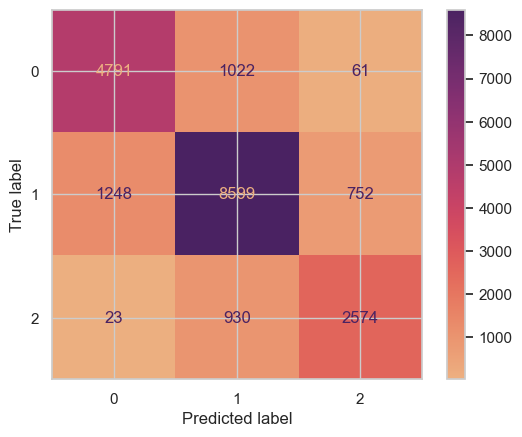

In [82]:
# Confusion Matrix 
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred,cmap="flare")

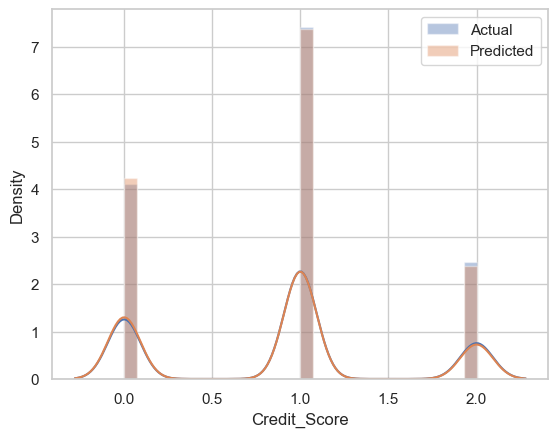

In [83]:
# Plotting the graph of actual and predicted Credit Score
sns.distplot(y_test,label = 'Actual')
sns.distplot(rf_y_pred,label = 'Predicted')
plt.legend()
plt.show()

**The accuracy of the random forest model is 79.82 percent**

In [84]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((3,6)), columns=['Training Accuracy Score','Cross Validation Score','Testing Accuracy Score', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)']

In [85]:
lr_results = [train_accuracy_lr, cross_val_score_avg_lr,test_accuracy_lr,precision_lr,recall_lr,f1_lr]
dt_results = [train_accuracy_dt, cross_val_score_avg_dt,test_accuracy_dt,precision_dt,recall_dt,f1_dt]
rf_results = [train_accuracy_rf, cross_val_score_avg_rf,test_accuracy_rf,precision_rf,recall_rf,f1_rf]
# Update the DataFrame
Evaluation_Results.loc['Logistic Regression (LR)'] = lr_results
Evaluation_Results.loc['Decision Tree Classifier (DT)'] = dt_results
Evaluation_Results.loc['Random Forest Classifier (RF)'] = rf_results

In [86]:
Evaluation_Results

,Training Accuracy Score,Cross Validation Score,Testing Accuracy Score,Precision,Recall,F1-score
Logistic Regression (LR),0.619850,0.28998,61.860,0.625273,0.61855,0.611897
Decision Tree Classifier (DT),0.797288,0.63414,71.325,0.711832,0.71325,0.712209
Random Forest Classifier (RF),0.999988,0.69496,79.820,0.798047,0.79820,0.798009


#### 9. Conclusion

+ Random Forest has almost perfect training accuracy, which might indicate overfitting. However, its testing accuracy is still high, suggesting good generalization.

+ Decision Tree and Random Forest outperform Logistic Regression in terms of accuracy and other metrics.

+ Cross-validation scores provide an estimate of how well the model is expected to perform on unseen data.






